In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv("cybersecurity_attacks.csv")

#show data columns
print(data.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv("cybersecurity_attacks.csv")

# Inspect the data
print(data.head())
print(data.info())
print(data['Attack Type'].value_counts())

# Drop rows with missing values
data = data.dropna()

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

In [9]:
# Encoding Categorical Data

from sklearn.preprocessing import LabelEncoder

# Encode source and destination IP addresses
encoder = LabelEncoder()
data['source_ip_encoded'] = encoder.fit_transform(data['Source IP Address'])
data['destination_ip_encoded'] = encoder.fit_transform(data['Destination IP Address'])

# Encode ports
data['source_port_encoded'] = encoder.fit_transform(data['Source Port'].astype(str))
data['destination_port_encoded'] = encoder.fit_transform(data['Destination Port'].astype(str))

In [13]:
# Feature Engineering

# Time features
data['hour'] = pd.to_datetime(data['Timestamp']).dt.hour
data['day_of_week'] = pd.to_datetime(data['Timestamp']).dt.dayofweek

In [16]:
# Define features and target
X = data[['hour', 'day_of_week', 'source_ip_encoded', 'destination_ip_encoded',
          'source_port_encoded', 'destination_port_encoded']]
y = data['Attack Type'] 

In [17]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

        DDoS       0.33      0.36      0.35      2636
   Intrusion       0.34      0.32      0.33      2721
     Malware       0.32      0.31      0.32      2643

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



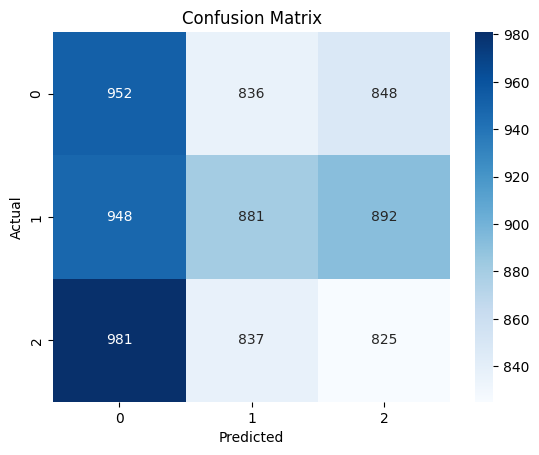

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()